### Probability of choosing the max valued feature on the trial

In [3]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData

from constants.behavioral_constants import *


import scipy


In [4]:
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
num_bins = 10


In [5]:
def get_session_beh(row):
    session = row.session_name

    behavior_path = SESS_BEHAVIOR_PATH.format(sess_name=session)
    beh = pd.read_csv(behavior_path)

    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    feature_selections = behavioral_utils.get_selection_features(valid_beh)
    valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber", how="inner")
    beh = behavioral_utils.get_feature_values_per_session(session, valid_beh)
    beh = behavioral_utils.get_max_feature_value(beh, num_bins=num_bins, quantize_bins=True)

    return beh

In [6]:
sessions = pd.read_pickle(SESSIONS_PATH)
all_beh = pd.concat(sessions.apply(get_session_beh, axis=1).values)

<Axes: >

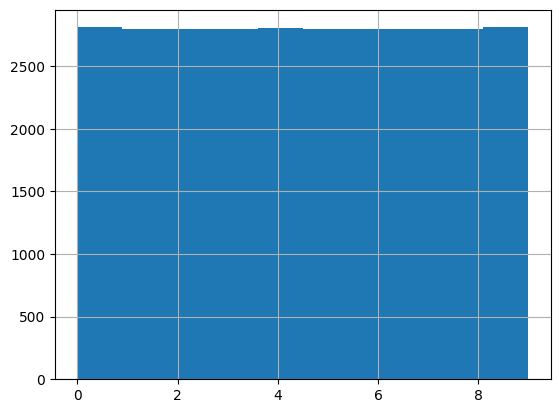

In [7]:
all_beh.MaxValueBin.hist()

In [8]:
num_features = len(FEATURES)
bins = np.arange(0, num_bins)
probs = np.empty((num_bins, num_features))

for value_bin in bins:
    print(f"evaluating bin {value_bin}")
    bin_beh = all_beh[all_beh.MaxValueBin == value_bin]
    for i, feat in enumerate(FEATURES):
        feat_max = bin_beh[bin_beh.MaxFeat == feat]
        feat_dim = FEATURE_TO_DIM[feat]
        chose_feat = feat_max[feat_max[feat_dim] == feat]
        probs[value_bin, i] = len(chose_feat) / len(feat_max)

evaluating bin 0
evaluating bin 1
evaluating bin 2
evaluating bin 3
evaluating bin 4
evaluating bin 5
evaluating bin 6
evaluating bin 7
evaluating bin 8
evaluating bin 9


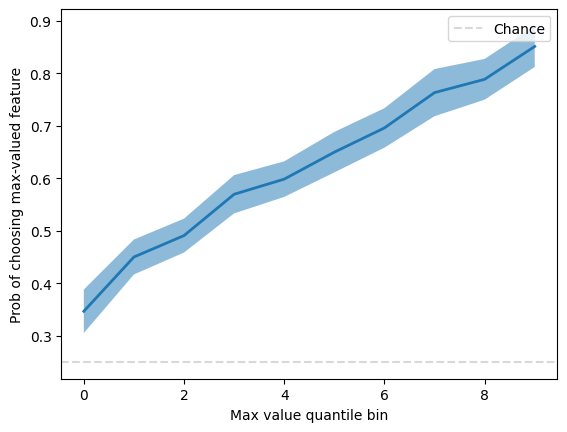

In [9]:
fig, ax = plt.subplots()
visualization_utils.visualize_accuracy_across_time_bins(probs, 0, 10, 1, ax)
ax.set_ylabel("Prob of choosing max-valued feature")
ax.set_xlabel("Max value quantile bin")
ax.axhline(0.25, alpha=0.3, color='gray', linestyle='dashed', label="Chance")
ax.legend()
